In [126]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [127]:
df_train=pd.read_excel("/content/Final_Train.xlsx")
df_test=pd.read_excel("/content/Final_Test.xlsx")

In [128]:
df_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [129]:
df_train.tail()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100
5960,"BDS, MDS - Orthodontics",17 years experience,100%,"Pitampura, Delhi",Dentist,Acrylic Partial Denture Crowns and Bridges Fix...,200


In [130]:
df_train.shape

(5961, 7)

In [131]:
df_train.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [132]:
df_test.shape

(1987, 6)

In [133]:
df_train.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [134]:
df_test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [135]:
df_train.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


In [136]:
df_train['Experience']=df_train['Experience'].str.replace('years experience','').astype(float)
df_test['Experience']=df_test['Experience'].str.replace('years experience','').astype(float)
df_train['Rating']=df_train['Rating'].str.replace('%','').astype(float)
df_test['Rating']=df_test['Rating'].str.replace('%','').astype(float)
df_train['Rating'].fillna(df_train['Rating'].mean(),inplace=True)
df_test['Rating'].fillna(df_test['Rating'].mean(),inplace=True)
df_train['Place'].fillna('General Medicine',inplace=True)
df_test['Place'].fillna('General Medicine',inplace=True)


In [137]:
df_train.isnull().sum()
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

In [138]:
df_train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24.0,100.000000,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12.0,98.000000,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
3,"BSc - Zoology, BAMS",12.0,94.643475,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20.0,100.000000,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
7,BDS,10.0,99.000000,"Arekere, Bangalore",Dentist,Dental Fillings Crowns and Bridges Fixing Impa...,200
...,...,...,...,...,...,...,...
5953,"MD - Homeopathy, Post Graduate Diploma in Heal...",35.0,92.000000,"Malleswaram, Bangalore",Homeopath,"92% 168 Feedback Malleswaram, Bangalore",100
5956,"MBBS, MS - ENT",19.0,98.000000,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5958,MBBS,41.0,97.000000,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15.0,90.000000,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


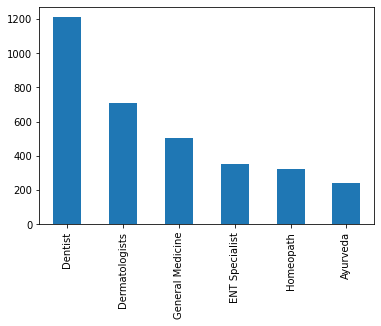

In [139]:
df_train['Profile'].value_counts().plot(kind='bar')

In [140]:
df_train['Qualification'].value_counts()

BDS                                                                                                       384
BHMS                                                                                                      159
MBBS, MD - Dermatology                                                                                    127
BAMS                                                                                                      120
MBBS, MS - ENT                                                                                            110
                                                                                                         ... 
MBBS, MS - Otorhinolaryngology, Diploma in Otorhinolaryngology (DLO)                                        1
BDS, MDS - Oral & Maxillofacial Surgery, Basic Life Support (BLS), Advanced Trauma Life Support (ATLS)      1
MD - General Medicine, PG in Diabetology (USA), FIMSA                                                       1
BDS, MDS, 

In [141]:
df_train['Experience'].value_counts()

9.0     214
12.0    186
10.0    181
11.0    181
8.0     162
14.0    158
19.0    156
13.0    154
7.0     153
6.0     121
16.0    119
15.0    118
18.0    116
5.0     113
17.0    106
21.0    105
22.0     87
20.0     85
23.0     69
4.0      55
24.0     55
3.0      55
28.0     46
25.0     45
27.0     42
29.0     34
26.0     33
31.0     32
2.0      32
32.0     29
34.0     28
37.0     27
30.0     27
33.0     25
38.0     24
35.0     20
40.0     19
36.0     16
39.0     15
41.0     14
46.0     13
0.0      12
43.0     10
42.0      9
44.0      9
45.0      8
47.0      5
49.0      4
48.0      4
50.0      3
51.0      3
52.0      1
56.0      1
58.0      1
53.0      1
Name: Experience, dtype: int64

In [142]:
df_train['Fees'].max()

950

In [143]:
df_train['Fees'].mean()

336.4247231367854

In [144]:
# Doctor's fees with profile
Doctor_pro_fee=pd.crosstab(df_train.Profile, df_train.Fees,margins=True)
Doctor_pro_fee

Fees,50,80,100,125,150,200,220,250,260,300,350,380,400,430,450,500,550,600,650,700,750,800,900,920,950,All
Profile,,,,,,,,,,,,,,,,,,,,,,,,,,
Ayurveda,0,0,30,0,16,33,0,17,0,44,9,0,16,0,0,68,0,4,0,0,1,1,0,0,0,239
Dentist,0,1,280,0,45,373,0,84,0,197,8,0,37,0,2,156,2,10,0,3,0,12,1,0,0,1211
Dermatologists,0,0,117,0,3,20,0,22,0,74,19,0,90,0,10,201,4,52,5,48,9,36,2,0,0,712
ENT Specialist,0,0,56,0,3,9,1,8,0,49,13,1,47,0,7,67,3,27,5,25,0,29,2,0,0,352
General Medicine,0,0,106,1,8,33,0,22,1,65,23,1,53,1,6,89,3,35,7,16,11,17,5,0,1,504
Homeopath,2,0,70,0,10,37,0,13,0,55,7,0,12,0,23,67,1,5,0,7,4,6,3,1,0,323
All,2,1,659,1,85,505,1,166,1,484,79,2,255,1,48,648,13,133,17,99,25,101,13,1,1,3341


In [145]:
# Doctor's profile in diffrent cities
Doctor_Area=pd.crosstab(df_train.Place, df_train.Profile,margins=True)
Doctor_Area

Profile,Ayurveda,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath,All
Place,,,,,,,
"AECS Layout, Bangalore",0,1,0,0,0,0,1
"AS Rao Nagar, Hyderabad",1,3,5,0,0,2,11
"Abbigere, Bangalore",1,0,0,0,0,0,1
"Abids, Hyderabad",0,0,0,0,1,0,1
"Adambakkam, Chennai",0,2,2,0,1,1,6
...,...,...,...,...,...,...,...
"Yelahanka New Town, Bangalore",0,2,1,0,1,1,5
"Yelahanka, Bangalore",7,0,1,1,4,3,16
"Yeshwanthpur, Bangalore",3,1,2,4,7,0,17


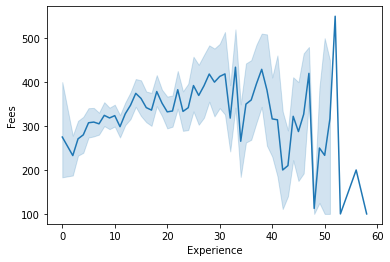

In [146]:
sns.lineplot( x=df_train["Experience"], y=df_train["Fees"])

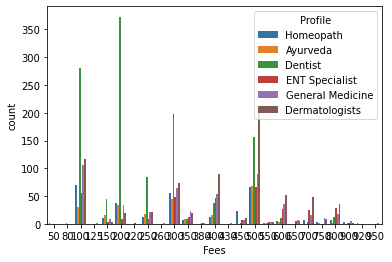

In [147]:
sns.countplot(x='Fees',hue='Profile',data=df_train)

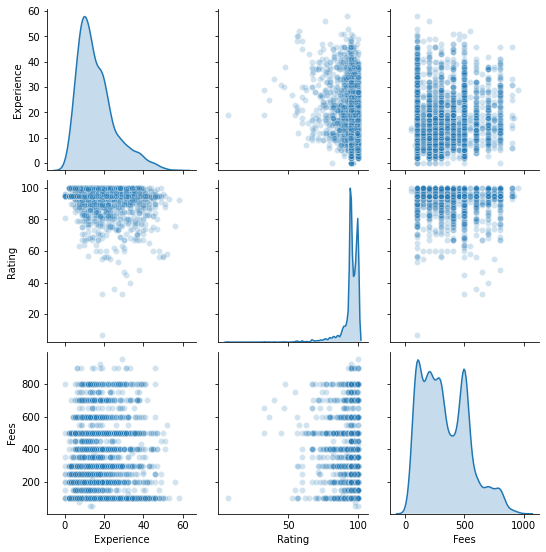

In [148]:
 sns.pairplot(df_train, diag_kind='kde', plot_kws={'alpha': 0.2})

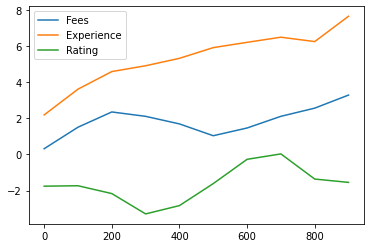

In [149]:
df1 = pd.DataFrame(np.random.randn(10, 3).cumsum(0),
columns=['Fees', 'Experience', 'Rating'],
index=np.arange(0, 1000, 100))
df1.plot()

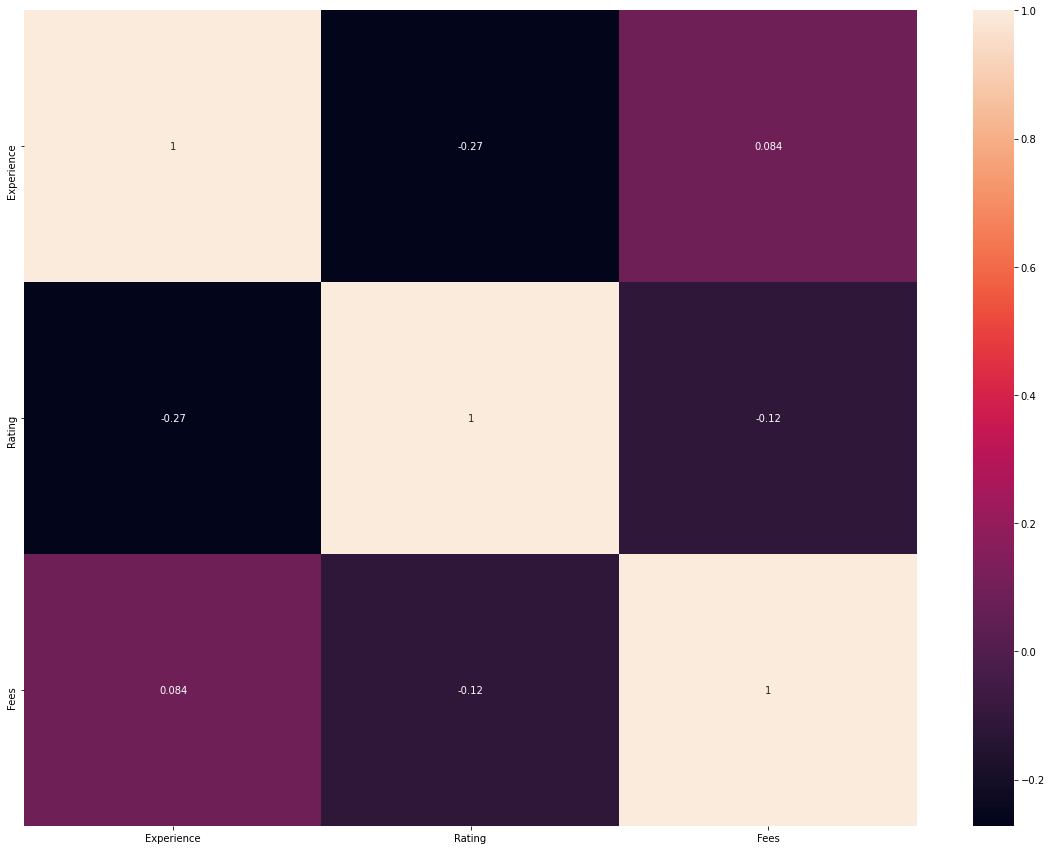

In [150]:
corr_hmap=df_train.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [151]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in df_train.columns:
    df_train[column] = labelencoder.fit_transform(df_train[column])
for column in df_test.columns:
    df_test[column] = labelencoder.fit_transform(df_test[column])

In [152]:
from scipy.stats import zscore
z_score=abs(zscore(df_train))
print(df_train.shape)
df1=df_train.loc[(z_score<3).all(axis=1)]
print(df1.shape)

(3341, 7)
(3214, 7)


In [153]:
from scipy.stats import zscore
z_score=abs(zscore(df_test))
print(df_test.shape)
df2=df_test.loc[(z_score<3).all(axis=1)]
print(df2.shape)

(1153, 6)
(1103, 6)


In [154]:
x=df1.iloc[:,0:-1]
y=df1.iloc[:,-1]

In [155]:
x,y

(      Qualification  Experience  Rating  Place  Profile  Miscellaneous_Info
 0               297          23      51    216        5                 130
 1                32          11      49    591        0                1422
 3               330          11      45     55        0                1695
 4                 3          19      51    241        0                 253
 7                63           9      50     28        1                1943
 ...             ...         ...     ...    ...      ...                 ...
 5953            863          34      42    317        5                 758
 5956            737          18      49     57        3                1385
 5958            407          40      48    152        4                1173
 5959            643          14      40    581        4                2202
 5960            167          16      51    424        1                1595
 
 [3214 rows x 6 columns], 0        2
 1       10
 3        7
 4        7
 

In [156]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
import sklearn.ensemble
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100



In [157]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 44)

In [158]:
print("The size of training input is", x_train.shape)
print("The size of training output is", y_train.shape)
print(50 *'*')
print("The size of testing input is", x_test.shape)
print("The size of testing output is", y_test.shape)

The size of training input is (2249, 6)
The size of training output is (2249,)
**************************************************
The size of testing input is (965, 6)
The size of testing output is (965,)


In [159]:
params ={'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
ridge_regressor =GridSearchCV(Ridge(), params ,cv =5,scoring = 'neg_mean_absolute_error', n_jobs =-1)
ridge_regressor.fit(x_train ,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [160]:
y_train_pred =ridge_regressor.predict(x_train) ##Predict train result
y_test_pred =ridge_regressor.predict(x_test) ##Predict test result

In [161]:
print("Train Results for Ridge Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Ridge Regressor Model:
--------------------------------------------------
Root mean squared error:  5.499636799915962
Mean absolute % error:  inf
R-squared:  0.0711843144393648


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide


In [162]:
print("Test Results for Ridge Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Ridge Regressor Model:
--------------------------------------------------
Root mean squared error:  5.559892150872795
Mean absolute % error:  101.0
R-squared:  0.06169051742433462


In [163]:
params ={'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
lasso_regressor =GridSearchCV(Lasso(), params ,cv =15,scoring = 'neg_mean_absolute_error', n_jobs =-1)
lasso_regressor.fit(x_train ,y_train)

GridSearchCV(cv=15, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [164]:
y_train_pred =lasso_regressor.predict(x_train) ##Predict train result
y_test_pred =lasso_regressor.predict(x_test) ##Predict test result

In [165]:
print("Train Results for Lasso Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Lasso Regressor Model:
--------------------------------------------------
Root mean squared error:  5.499153253087518
Mean absolute % error:  inf
R-squared:  0.07134763654624621


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide


In [166]:
k_range = list(range(1, 30))
params = dict(n_neighbors = k_range)
knn_regressor = GridSearchCV(KNeighborsRegressor(), params, cv =10, scoring = 'neg_mean_squared_error')
knn_regressor.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [167]:
y_train_pred =knn_regressor.predict(x_train) ##Predict train result
y_test_pred =knn_regressor.predict(x_test) ##Predict test result

In [168]:
print("Train Results for KNN Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for KNN Regressor Model:
--------------------------------------------------
Root mean squared error:  5.2412829857189225
Mean absolute % error:  inf
R-squared:  0.1563996725176896


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide


In [169]:
print("Test Results for KNN Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % errorr: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for KNN Regressor Model:
--------------------------------------------------
Root mean squared error:  5.457337638271736
Mean absolute % errorr:  98.0
R-squared:  0.09598628705479872


In [170]:
depth  =list(range(3,30))
param_grid =dict(max_depth =depth)
tree =GridSearchCV(DecisionTreeRegressor(),param_grid,cv =10)
tree.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23,

In [171]:
y_train_pred =tree.predict(x_train) ##Predict train result
y_test_pred =tree.predict(x_test) ##Predict test result

In [172]:
print("Train Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  5.214930068843835
Mean absolute % error:  inf
R-squared:  0.1648615091874962


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide


In [173]:
print("Test Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  5.35988325144145
Mean absolute % error:  96.0
R-squared:  0.12798484908045193


In [174]:
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
random_regressor = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter = 20, scoring = 'neg_mean_absolute_error', cv = 5, n_jobs = -1)
random_regressor.fit(x_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [175]:
y_train_pred = random_regressor.predict(x_train)
y_test_pred = random_regressor.predict(x_test)

In [176]:
print("Train Results for Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Random Forest Regressor Model:
--------------------------------------------------
Root mean squared error:  3.502233522979244
Mean absolute % error:  inf
R-squared:  0.6233380730491649


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide


In [177]:
print("Test Results for Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Random Forest Regressor Model:
--------------------------------------------------
Root mean squared error:  5.254564163652274
Mean absolute % error:  92.0
R-squared:  0.16191750468767874


In [178]:
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
model = RandomizedSearchCV(XGBRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(x_train, y_train)

[18:24:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                                          seed=None, silent=None, subsample=1,
                                          verbosity=1),
                   iid='deprecated', n_iter=20, n_job

In [179]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [180]:
print("Train Results for XGBoost Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for XGBoost Regressor Model:
--------------------------------------------------
Root mean squared error:  2.939271319544015
Mean absolute % error:  inf
R-squared:  0.7346977847370144


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide


In [181]:
print("Test Results for XGBoost Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for XGBoost Regressor Model:
--------------------------------------------------
Root mean squared error:  5.292424923713541
Mean absolute % error:  87.0
R-squared:  0.14979670718934424


In [182]:
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
gradient_boosting_regressor_model = RandomizedSearchCV(GradientBoostingRegressor(), tuned_params, n_iter = 20, scoring = 'neg_mean_absolute_error', cv = 5, n_jobs = -1)
gradient_boosting_regressor_model.fit(x_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                             

In [183]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [184]:
print("Train Results for GradientBoostingRegressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for GradientBoostingRegressor Model:
--------------------------------------------------
Root mean squared error:  2.939271319544015
Mean absolute % error:  inf
R-squared:  0.7346977847370144


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide


In [185]:
print("Test Results for GradientBoostingRegressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for GradientBoostingRegressor Model:
--------------------------------------------------
Root mean squared error:  5.292424923713541
Mean absolute % error:  87.0
R-squared:  0.14979670718934424


In [186]:
from sklearn.externals import joblib
joblib.dump(gradient_boosting_regressor_model,'PROJECT13_MODEL1.pkl')
model1=joblib.load('PROJECT13_MODEL1.pkl')
model1.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


array([ 9.42332505, 12.07141494,  7.29756399,  7.05758927, 11.44452921,
        9.58791201, 11.96928845,  5.60864311,  5.90721191,  8.09124206,
       11.73096454,  4.023539  , 12.56409419,  8.9535614 , 11.64520577,
       12.84806776, 12.15270857, 11.09728213, 15.21729284,  9.90256389,
       15.02842428,  9.28681571,  6.66898483,  6.57203995, 10.42281922,
       13.33904283,  8.01724927,  7.9256417 , 11.25445632,  9.41149789,
        9.67057859,  8.92670793, 14.07824011,  5.48402572,  6.44550526,
        8.26976153,  9.18360247, 14.02644286, 13.12140711,  6.03667215,
        8.05462139,  6.04866753, 13.44220887, 10.498345  ,  8.39935808,
       11.64345676,  9.59665653, 10.35275484, 11.33799101,  6.23928298,
       10.73005729,  8.39420063,  6.05446477,  7.18136237, 13.32528267,
       13.72284374, 11.20100473,  4.96582743, 11.2650713 ,  5.31214348,
       11.42037252,  9.89510718, 13.97375415,  6.17308319, 12.46407621,
        9.07066628, 11.21728902, 12.45807344, 14.07315081, 15.01

**Finding from EDA **
* Dentist is most while Ayurved is the least frequent doctor with average fees is 100 and 500 .
* Genral Madicine Doctors consultant fee much higher then others which is arround 950.

* Fees totally depend upon Doctor's Experience up to 50years after that Experience doesn't impact on fees.

*Their are not any strong correlation between columns in data sets.